<a href="https://colab.research.google.com/github/TeneikaAskew/BudgetHighlights/blob/main/Clicked_Demo_Budget_Highlights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook was used during a demo for a Clicked Shadow session to show how you can use Gen AI to build a model in under 2 hours with the support of tools like ChatGPT and Colab AI. I spent another 2 hours refining this notebook to share an example of it a bit more refined.

# Mount Google Drive

In [338]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/Shared drives/Projects/Clicked'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shared drives/Projects/Clicked


In [339]:
#example of using Colab AI
# prompt: write a script to mount my google drive folder

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Change directory to the desired folder within Google Drive
%cd '/content/drive/My Drive/Colab Notebooks'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


# Install PDF Packages

In [340]:
!pip install PyMuPDF -q

In [341]:
import os
import requests
import fitz  # PyMuPDF

In [342]:
# Define the URL of the PDF file
pdf_url = "https://www.secnav.navy.mil/fmc/fmb/Documents/23pres/Highlights_Book.pdf"

# Define the folder to save the PDF file
folder_path = "/content/drive/Shared drives/Projects/Clicked/"

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Generate the file name from the URL
file_name = os.path.basename(pdf_url)

# Construct the full file path
file_path = os.path.join(folder_path, file_name)

In [343]:
file_url="https://www.secnav.navy.mil/fmc/fmb/Documents/23pres/Highlights_Book.pdf"
r = requests.get(file_url, stream = True)
# Increase the chunk size for faster download (e.g., 8192 bytes)
chunk_size = 8192

In [344]:
from tqdm import tqdm
path1= "/content/drive/Shared drives/Projects/Clicked/dHighlights_Book.pdf"
with requests.get(file_url, stream=True) as response:
    length = int(response.headers['Content-Length'])
    print("Content Size/Total:",length)
    response.raise_for_status()
    with open(path1, "wb") as file:
        bar = tqdm(total=length)
        for chunk in response.iter_content(chunk_size=chunk_size):
            if chunk:
                file.write(chunk)
                bar.update(len(chunk))

Content Size/Total: 245



  0%|          | 0/245 [00:00<?, ?it/s]

In [345]:
# Open the downloaded PDF file
with fitz.open(file_path) as pdf_document:
    # Extract text from each page and concatenate it
    text = ""
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        text += page.get_text()

    # Print the extracted text
    #print("Extracted text from the PDF:", text) #comment out before commit

100%|██████████| 245/245 [04:53<00:00,  1.20s/it]


# Text Pre-Processing

In [346]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

In [347]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [348]:
sentences = nltk.sent_tokenize(text)
#print(sentences)
len(sentences)

['The BOTTOM LINE  \nhttps://www.secnav.navy.mil/fmc/fmb/Pages/Fiscal-Year-2023.aspx \n   \n \n  Deputy Assistant Secretary of the Navy (Budget) \nFiscal Year 2023 Department of the Navy Budget Submission \nThe Department of the Navy’s (DON) FY 2023 President’s Budget (PB23) request is $230.8B, an increase of $9.1B from the \nFY 2022 enacted budget (with supplementals).', 'The budget is aligned with the draft National Security Strategy and defense \npriorities.', 'It resources a Navy and Marine Corps Team that supports Secretary Austin’s vision of integrated deterrence, \ncampaigning, and building enduring advantages, with an agile and ready joint force.', 'Moreover, Secretary of the Navy Del \nToro’s enduring priorities of strengthening maritime dominance in defense of our nation, empowering our warfighters, and \nstrengthening strategic partnerships is nested under this guidance and resourced to achieve these effects.', 'Soundly aligned with strategy, the budget implements concepts a

1324

In [349]:
import pandas as pd
# Create a DataFrame to store the sentences
df_sentences = pd.DataFrame(sentences, columns=['Sentence'])

In [350]:
# Display the DataFrame
print(df_sentences)

                                               Sentence
0     The BOTTOM LINE  \nhttps://www.secnav.navy.mil...
1     The budget is aligned with the draft National ...
2     It resources a Navy and Marine Corps Team that...
3     Moreover, Secretary of the Navy Del \nToro’s e...
4     Soundly aligned with strategy, the budget impl...
...                                                 ...
1319  RDTEN funding in FY \n2023 continues to accele...
1320  Strengthening Strategic Partnerships – Climate...
1321  2022  \nAppropriation Tables \n \n \nFY 2023 D...
1322  FY 2021\nFY 2022\nFY 2023\n_2/ FY 2021 does no...
1323  2022  \nAppropriation Tables \n \n \nFY 2023 D...

[1324 rows x 1 columns]


In [351]:
# Preprocess text
text = text.lower()
text = re.sub(r'\W', ' ', text)
text = re.sub(r'\s+', ' ', text)
tokens = nltk.word_tokenize(text)
tokens = [word for word in tokens if word not in stopwords.words('english')]
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]

# Show a snippet of processed tokens
print(tokens[:100])

['bottom', 'line', 'http', 'www', 'secnav', 'navy', 'mil', 'fmc', 'fmb', 'page', 'fiscal', 'year', '2023', 'aspx', 'deputy', 'assistant', 'secretary', 'navy', 'budget', 'fiscal', 'year', '2023', 'department', 'navy', 'budget', 'submission', 'department', 'navy', 'fy', '2023', 'president', 'budget', 'pb23', 'request', '230', '8b', 'increase', '9', '1b', 'fy', '2022', 'enacted', 'budget', 'supplementals', 'budget', 'aligned', 'draft', 'national', 'security', 'strategy', 'defense', 'priority', 'resource', 'navy', 'marine', 'corp', 'team', 'support', 'secretary', 'austin', 'vision', 'integrated', 'deterrence', 'campaigning', 'building', 'enduring', 'advantage', 'agile', 'ready', 'joint', 'force', 'moreover', 'secretary', 'navy', 'del', 'toro', 'enduring', 'priority', 'strengthening', 'maritime', 'dominance', 'defense', 'nation', 'empowering', 'warfighters', 'strengthening', 'strategic', 'partnership', 'nested', 'guidance', 'resourced', 'achieve', 'effect', 'soundly', 'aligned', 'strategy',

<img src="https://www.nlplanet.org/course-practical-nlp/_images/stemming_vs_lemmatization.png">

In [352]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)  # Return as string for better readability in DataFrame

In [353]:
# Pre-load stopwords and lemmatizer to improve efficiency
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Sentence Segmentation
Split the extracted text into sentences.

In [354]:
# Apply the preprocess function to each row in the 'Sentence' column
df_sentences['Preprocessed'] = df_sentences['Sentence'].apply(preprocess)

# Display the DataFrame to see the results
df_sentences

,Sentence,Preprocessed
0,The BOTTOM LINE \nhttps://www.secnav.navy.mil...,bottom line http www secnav navy mil fmc fmb p...
1,The budget is aligned with the draft National ...,budget aligned draft national security strateg...
2,It resources a Navy and Marine Corps Team that...,resource navy marine corp team support secreta...
3,"Moreover, Secretary of the Navy Del \nToro’s e...",moreover secretary navy del toro enduring prio...
4,"Soundly aligned with strategy, the budget impl...",soundly aligned strategy budget implement conc...
...,...,...
1319,RDTEN funding in FY \n2023 continues to accele...,rdten funding fy 2023 continues accelerate sup...
1320,Strengthening Strategic Partnerships – Climate...,strengthening strategic partnership climate 20...
1321,2022 \nAppropriation Tables \n \n \nFY 2023 D...,2022 appropriation table fy 2023 department na...
1322,FY 2021\nFY 2022\nFY 2023\n_2/ FY 2021 does no...,fy 2021 fy 2022 fy 2023 _2 fy 2021 include 407...


https://www.nlplanet.org/course-practical-nlp/01-intro-to-nlp/05-tokenization-stemming-lemmatization

# Sentence Classification
Creating a classifier based on a pre-trained model or simple heuristics to classify sentences

In [355]:
data = [
    ("The budget allocates $500 million to naval research and development.", "Research"),
    ("An increase in health insurance subsidies for veterans is proposed.", "Healthcare"),
    ("Funding for aircraft and equipment procurement is set to increase by 20%.", "Defense"),
    ("Educational grants for service members are to be expanded.", "Education"),
    ("Plans to renovate public transportation infrastructure have been approved.", "Infrastructure"),
    ("New legislation aims to improve data privacy and security for all citizens.", "Legislation"),
    ("Government increases funding for renewable energy projects to reduce carbon emissions.", "Environment"),
    ("A rise in funding for mental health services to support community well-being.", "Healthcare"),
    ("The introduction of a bill to support small businesses with tax breaks.", "Economic Development"),
    ("Expansion of free internet access to low-income households announced.", "Technology"),
    ("Increased investment in space exploration technology.", "Research"),
    ("New regulations for pharmaceutical pricing to ensure affordability.", "Healthcare"),
    ("Subsidies for agricultural development are expected to boost food production.", "Agriculture"),
    ("A proposal to enhance veteran benefits and services.", "Veteran Affairs"),
    ("Budget cuts are expected in the arts and culture sector.", "Arts"),
    ("Enhancements in cybersecurity measures for national defense.", "Defense"),
    ("Increased grants for scientific research in universities.", "Education"),
    ("Implementation of stricter emissions standards for automobiles.", "Environment"),
    ("Development of new public parks and recreational facilities.", "Infrastructure"),
    ("Reforms in immigration law expected to streamline processing.", "Legislation")
     # Add more examples
]

exampleCategoriesdf = pd.DataFrame(data, columns=['Sentence', 'Category'])
#exampleCategoriesdf

In [356]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform([text])

In [357]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Split data into training and test sets - we don't need to do this since it we have 2 different data sets
X_train, X_test, y_train, y_test = train_test_split(exampleCategoriesdf['Sentence'], exampleCategoriesdf['Category'], test_size=0.2, random_state=42)
# X_train, y_train = train_df['Sentence'], train_df['Category']

# Create a text classification pipeline
pipeline = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression()
)

# Train the model using the entire training dataset (exampleCategoriesdf)
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display classification report
report = classification_report(y_test, y_pred, zero_division=0) #this can only be used when you have actual true values in your dataset (you have validated/labeled some of the data already)
print("Classification Report:")
print(report)
#The overall accuracy of the model is just 25%, which is extremely low. This suggests that the model is not effective for practical use as it currently stands.

Accuracy: 0.25
Classification Report:
                precision    recall  f1-score   support

       Defense       0.00      0.00      0.00         1
     Education       0.00      0.00      0.00         0
   Environment       0.00      0.00      0.00         1
    Healthcare       1.00      1.00      1.00         1
Infrastructure       0.00      0.00      0.00         0
      Research       0.00      0.00      0.00         1

      accuracy                           0.25         4
     macro avg       0.17      0.17      0.17         4
  weighted avg       0.25      0.25      0.25         4



In [358]:
# X_train
# y_train
# X_test
# y_test
# y_pred
#Test to check the size
print(y_test.shape)
print("Test Values:")
print(y_test)
print(y_pred.shape)
print("Predicted Values:")
print(y_pred)

(4,)
Test Values:
0        Research
17    Environment
15        Defense
1      Healthcare
Name: Category, dtype: object
(4,)
Predicted Values:
['Infrastructure' 'Infrastructure' 'Education' 'Healthcare']


In [359]:
# Predict on new, unseen preprocessed text from df_sentences
pred_cat = df_sentences['Preprocessed']
predictions = pipeline.predict(pred_cat)
predictions
df_sentences['Predicted Category'] = predictions
print(df_sentences[['Sentence', 'Predicted Category']])

                                               Sentence Predicted Category
0     The BOTTOM LINE  \nhttps://www.secnav.navy.mil...     Infrastructure
1     The budget is aligned with the draft National ...        Legislation
2     It resources a Navy and Marine Corps Team that...         Healthcare
3     Moreover, Secretary of the Navy Del \nToro’s e...     Infrastructure
4     Soundly aligned with strategy, the budget impl...     Infrastructure
...                                                 ...                ...
1319  RDTEN funding in FY \n2023 continues to accele...         Healthcare
1320  Strengthening Strategic Partnerships – Climate...     Infrastructure
1321  2022  \nAppropriation Tables \n \n \nFY 2023 D...         Healthcare
1322  FY 2021\nFY 2022\nFY 2023\n_2/ FY 2021 does no...     Infrastructure
1323  2022  \nAppropriation Tables \n \n \nFY 2023 D...     Infrastructure

[1324 rows x 2 columns]


### Example using targeted data (if I upsampled a few classes)

In [360]:
data = [
    ("The budget allocates $500 million to naval research and development.", "Research"),
    ("Funding for aircraft and equipment procurement is set to increase by 20%.", "Defense"),
    ("Educational grants for service members are to be expanded.", "Education"),
    ("Increased investment in space exploration technology.", "Research"),
    ("Enhancements in cybersecurity measures for national defense.", "Defense"),
    ("Increased grants for scientific research in universities.", "Education"),
    ("Proposal for a new satellite surveillance program to enhance national security.", "Defense"),
    ("Initiative to develop advanced AI technologies for military applications.", "Research"),
    ("Government plans to offer scholarships for graduate students in STEM fields.", "Education"),
    ("Investment in biotechnology research aiming to improve disease resistance.", "Research"),
    ("Development of a new anti-missile defense system.", "Defense"),
    ("Special funding for interdisciplinary research in climate change and environmental sciences.", "Research"),
    ("Expansion of vocational training programs for high-tech manufacturing skills.", "Education"),
    ("Launch of a collaborative research project on quantum computing and its applications.", "Research"),
    ("Modernization of military bases and installations to enhance operational capabilities.", "Defense"),
    ("Grants for universities to improve online learning platforms and technologies.", "Education"),
    ("Funding for the development of unmanned combat aerial vehicles.", "Defense"),
    ("Research initiatives focused on renewable energy solutions for public institutions.", "Research"),
    ("National program to improve educational infrastructures in rural areas.", "Education"),
    ("Advanced training programs for drone warfare tactics.", "Defense")
]

exampleCategoriesdf = pd.DataFrame(data, columns=['Sentence', 'Category'])

# Split data into training and test sets - we don't need to do this since it we have 2 different data sets
X_train, X_test, y_train, y_test = train_test_split(exampleCategoriesdf['Sentence'], exampleCategoriesdf['Category'], test_size=0.2, random_state=42)
# X_train, y_train = train_df['Sentence'], train_df['Category']

# Create a text classification pipeline
pipeline = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression()
)

# Train the model using the entire training dataset (exampleCategoriesdf)
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

#The overall accuracy of the model has improved to 75% using more refined data and adding more samples of defense, research and education solely

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

     Defense       0.50      1.00      0.67         1
   Education       1.00      1.00      1.00         1
    Research       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.83      0.78         4
weighted avg       0.88      0.75      0.75         4



In [361]:
# Now, to classify new text:
#new_text = ["The budget plans include a $200 million increase in cybersecurity defense."]
new_text = ["Educational grants for service members are to be expanded."]
#new_text = ["Funding for aircraft and equipment procurement is set to increase by 20%.."]
new_prediction = pipeline.predict(new_text)

# Print the classification result
print(f"Classification: {new_prediction[0]}")

Classification: Education


In [362]:
# Predict on new, unseen preprocessed text from df_sentences
pred_cat = df_sentences['Preprocessed']
predictions = pipeline.predict(pred_cat)
predictions
df_sentences['Predicted Category'] = predictions
print(df_sentences[['Sentence', 'Predicted Category']])

                                               Sentence Predicted Category
0     The BOTTOM LINE  \nhttps://www.secnav.navy.mil...            Defense
1     The budget is aligned with the draft National ...            Defense
2     It resources a Navy and Marine Corps Team that...            Defense
3     Moreover, Secretary of the Navy Del \nToro’s e...            Defense
4     Soundly aligned with strategy, the budget impl...            Defense
...                                                 ...                ...
1319  RDTEN funding in FY \n2023 continues to accele...            Defense
1320  Strengthening Strategic Partnerships – Climate...           Research
1321  2022  \nAppropriation Tables \n \n \nFY 2023 D...            Defense
1322  FY 2021\nFY 2022\nFY 2023\n_2/ FY 2021 does no...            Defense
1323  2022  \nAppropriation Tables \n \n \nFY 2023 D...            Defense

[1324 rows x 2 columns]


In [363]:
df_sentences[df_sentences['Predicted Category'] == 'Defense']

,Sentence,Preprocessed,Predicted Category
0,The BOTTOM LINE \nhttps://www.secnav.navy.mil...,bottom line http www secnav navy mil fmc fmb p...,Defense
1,The budget is aligned with the draft National ...,budget aligned draft national security strateg...,Defense
2,It resources a Navy and Marine Corps Team that...,resource navy marine corp team support secreta...,Defense
3,"Moreover, Secretary of the Navy Del \nToro’s e...",moreover secretary navy del toro enduring prio...,Defense
4,"Soundly aligned with strategy, the budget impl...",soundly aligned strategy budget implement conc...,Defense
...,...,...,...
1318,Expeditionary Energy Office (E2O) \n \nThe Exp...,expeditionary energy office e2o expeditionary ...,Defense
1319,RDTEN funding in FY \n2023 continues to accele...,rdten funding fy 2023 continues accelerate sup...,Defense
1321,2022 \nAppropriation Tables \n \n \nFY 2023 D...,2022 appropriation table fy 2023 department na...,Defense
1322,FY 2021\nFY 2022\nFY 2023\n_2/ FY 2021 does no...,fy 2021 fy 2022 fy 2023 _2 fy 2021 include 407...,Defense


In [364]:
df_sentences[df_sentences['Predicted Category'] != 'Defense']

,Sentence,Preprocessed,Predicted Category
6,"PB23 continues investments in more lethal, net...",pb23 continues investment lethal networked cap...,Research
37,Both countries continue advancements in weapon...,country continue advancement weapon introducti...,Research
39,It needs to be a fleet that can \ncontrol the ...,need fleet control sea project power across do...,Research
42,The Department continues to optimize resources...,department continues optimize resource develop...,Research
48,President’s Budget 2023 (PB23) continues inves...,president budget 2023 pb23 continues investmen...,Research
...,...,...,...
1305,Figure 15.1 – DON Climate Investment \n \n(Dol...,figure 15 1 climate investment dollar million ...,Research
1312,"In addition, funding addresses advancing \ndes...",addition funding address advancing design tool...,Research
1313,2022 ...,2022 strengthening strategic partnership clima...,Research
1315,"Research, \nDevelopment, Test and Evaluation, ...",research development test evaluation navy rdte...,Research


# Word Cloud

In [365]:
#text

In [366]:
!pip install wordcloud -q

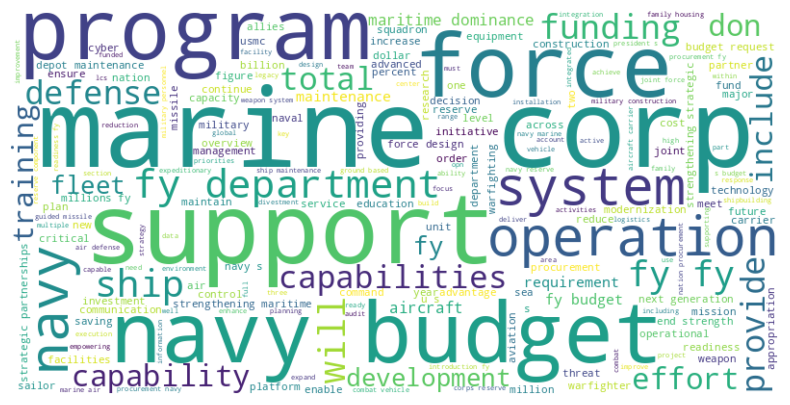

In [367]:
#Generate a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.show()

# Summarization

Text Summarization

In [368]:
!pip install bert-extractive-summarizer -q

In [369]:
!pip install transformers -q
from transformers import pipeline
# Initialize the summarization pipeline
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[Hugging Face Transformers Library](https://huggingface.co/docs/transformers/index)

In [370]:
text_length = len(text)
print(f"Input text length: {text_length}")

max_input_length = summarizer.model.config.max_position_embeddings
print(f"Model's maximum input length: {max_input_length}")

truncated_text = text[:max_input_length]
print(len(truncated_text))
summary = summarizer(truncated_text)
#too large to use the following - need paid plan
# summarizer = pipeline("summarization")
# summary = summarizer(text)
print(summary)

Input text length: 305644
Model's maximum input length: 1024
1024
[{'summary_text': ' The budget is aligned with the draft national security strategy and defense priorities . It resources a navy and marine corps team that supports secretary austin s vision of integrated deterrence campaigning . The budget implements concepts articulated in the chief of naval operations navigation plan to expand our fleet capabilitie .'}]


Summarization pipeline using the BART-large model from Facebook (still using HF Library)

In [371]:
text_length = len(text)
print(f"Input text length: {text_length}")

max_input_length = summarizer.model.config.max_position_embeddings
print(f"Model's maximum input length: {max_input_length}")

truncated_text = text[:max_input_length]
print(len(truncated_text))

summarizer = pipeline("summarization", model="facebook/bart-large")
summary = summarizer(truncated_text)
print(summary)

Input text length: 305644
Model's maximum input length: 1024
1024
[{'summary_text': 'the bottom line https www secnav navy mil fmc fmb pages fiscal year 2023 aspx deputy assistant secretary of the navy budget fy 2023 secretary of defense budget fiscal year 2020 secretary of homeland security budget fiscal 2023 deputy assistant general counsel budget fiscal 2020 deputy assistant chief of naval operations budget fiscal 2018 deputy assistant deputy general counsels budget fiscal fiscal year 2017 deputy assistant director of naval affairs budget the budget is aligned with the draft national security strategy and defense priorities it resources a navy and marine corps team that supports secretary austin s vision of integrated deterrence campaigning and building enduring advantages with an agile and ready joint force moreover secretary'}]


In [372]:
!pip install sumy -q

In [374]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

# Initialize parser and tokenizer
parser = PlaintextParser.from_string(text, Tokenizer("english"))

# Initialize LexRank summarizer
summarizer = LexRankSummarizer()

# Summarize the text
summary = summarizer(parser.document, sentences_count=2)  # You can specify the number of sentences in the summary

# Print the summary
for sentence in summary:
    print(sentence) #commit out when committing


the bottom line https www secnav navy mil fmc fmb pages fiscal year 2023 aspx deputy assistant secretary of the navy budget fiscal year 2023 department of the navy budget submission the department of the navy s don fy 2023 president s budget pb23 request is 230 8b an increase of 9 1b from the fy 2022 enacted budget with supplementals the budget is aligned with the draft national security strategy and defense priorities it resources a navy and marine corps team that supports secretary austin s vision of integrated deterrence campaigning and building enduring advantages with an agile and ready joint force moreover secretary of the navy del toro s enduring priorities of strengthening maritime dominance in defense of our nation empowering our warfighters and strengthening strategic partnerships is nested under this guidance and resourced to achieve these effects soundly aligned with strategy the budget implements concepts articulated in the chief of naval operations navigation plan to expa

# OPEN AI

In [ ]:
!pip install openai -q

In [ ]:
!pip install python-dotenv -q
import dotenv
dotenv.load_dotenv('/content/drive/MyDrive/.env')

In [ ]:
# import openai_secret_manager

# assert "openai" in openai_secret_manager.get_services()
# secrets = openai_secret_manager.get_secret("openai")
import openai
openai.api_key = os.environ.get('OPEN_AI_KEY')

In [ ]:
#text

In [ ]:
def split_text(text):
    max_chunk_size = 2048
    chunks = []
    current_chunk = ""
    for sentence in text.split("."):
        if len(current_chunk) + len(sentence) < max_chunk_size:
            current_chunk += sentence + "."
        else:
            chunks.append(current_chunk.strip())
            current_chunk = sentence + "."
    if current_chunk:
        chunks.append(current_chunk.strip())
    return chunks

In [ ]:
generate_summary(text)

In [ ]:
sample= text[3000:4000]

In [ ]:


def generate_summary(text):
    input_chunks = text.split("\n")
    output_chunks = []
    for chunk in input_chunks:
        response = openai.completions.create(
            model="gpt-3.5-turbo",  # Replace with the desired model
            prompt=f"Please summarize the following text:\n{chunk}\n\nSummary:",
            temperature=0,
            max_tokens=100
        )
        output_chunks.append(response.choices[0].text)
    return "\n".join(output_chunks)

# Execute the function with the provided text
summary = generate_summary(sample)

# Print the summary
print(summary)